<h2><center>Tugas 2 Data Mining 2019/2020</center></h2>

<center><font color="red">Deadline: 19 Oktober 2019 pukul 23.55</font><center>

---





<h4>Nama    : Muhammad Yudistira Hanifmuti </h4>
<h4>NPM     : 1606829560 </h4>

<b>Petunjuk umum:</b>
1. Dataset yang digunakan pada tugas ini merupakan dataset <i><b>YEAST</b></i> yang dapat diunduh di : https://archive.ics.uci.edu/ml/datasets/Yeast
Deskripsi atribut pada dataset dapat dilihat pada halaman tersebut.
2. Lakukan pengolahan data dan perhitungan menggunakan bahasa pemrograman Python. Gunakan template Jupyter notebook yang telah disediakan untuk menjawab soal.
3. Format penulisan nama file di Jupyter notebook: T2_Nama_NIM.ipynb
4. Kumpulkan pada slot yang disediakan di scele. Deadline: 3 Oktober 2019 pukul 23.55.


<b>Principal Component Analysis (PCA) (total 50 poin)</b>

1. <b>[25 poin]</b> Lakukan implementasi Principal Component Analysis (PCA) pada dataset yeast dengan ketentuan sebagai berikut :

    a. Jumlah komponen harus meng-capture 92% dari total variance.
    
    b. Penggunaan library yang diperbolehkan pada implementasi hanya library numpy.  
    
    c. Berikan penjelasan/komentar singkat dari setiap langkah-langkah dari code yang anda buat.
    
    
2. <b>[10 poin]</b> Lakukan implementasi Principal Component Analysis (PCA) dengan menggunakan library (mis: Scikit-Learn) pada dataset yeast. Pemilihan jumlah komponen harus meng-capture 92% dari total variance.
3. <b>[5 poin]</b> Hitunglah Mean Squared Error (MSE) pada soal nomor satu (1) dan nomor (2).
4. <b>[5 poin]</b> Bandingkan hasil reduksi PCA secara manual dan PCA dengan menggunakan library! Apakah hasil yang diperoleh sama? Mengapa demikian?
5. <b>[5 poin]</b> Pilih 2 kolom untuk melakukan plotting data hasil reduksi yang anda peroleh pada nomor 1 dan 2, lakukan analisis sederhana dari hasil plotting yang dibuat !


Jawaban :

1.

In [1]:
import numpy as np
import requests

# Load dataset yeast

## Reshape dataset
def reshape_yeast(dataset):
    row_mapper = lambda row: np.array(list(map(lambda x: x, row)))
    return np.array(list(map(row_mapper, dataset)))

## Dataset split
def split_yeast(dataset):
    temp = reshape_yeast(dataset)
    dataset_len = temp.shape[1]
    name, data, target = temp[:, 0], temp[:, 1:dataset_len-1], temp[:, dataset_len-1]
    return name.astype(str), data.astype(np.float32), target.astype(str)

## Load dataset
def load_dataset():
    ## yeast URL
    dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
    desc_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.names"
    columns = ('sequence_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'target')
    column_types = ('|S15', np.float, np.float, np.float, np.float, np.float, np.float, np.float, np.float, '|S15')

    ## Download and write yeast.data
    r = requests.get(dataset_url, allow_redirects=True)
    open('yeast.data', 'wb').write(r.content)

    ## Read yeast.data
    dataset = np.loadtxt('yeast.data', dtype={'names': columns, 'formats': column_types})
    return split_yeast(dataset)
    
yeast_name, yeast_data, yeast_target = load_dataset()

In [2]:
# Principal Component Analysis (PCA) implementation

from numpy import linalg as LA
    
## PCA function
def myPCA(data, variance):
    ## compute mean
    mean = np.mean(data, axis=0)
    
    ## center the data
    centered_data = data - mean.T
    
    ## compute covariance matrix, slightly different with np.cov() method
    my_cov = np.dot(centered_data.T, centered_data)/(data.shape[0] - 1)
    # cov_mat = np.cov(data.T)
    
    # compute eigenvalues and eigenvectors
    w, v = LA.eig(my_cov)
    sorted_idx = w.argsort()[::-1]
    
    # find optimal fraction of total variance
    w_sum = np.sum(w)
    
    def variance_fraction(r):
        return np.sum(w[sorted_idx[:r]])/w_sum
    
    r = 0
    for i in range(data.shape[1]):
        if variance_fraction(i + 1) >= variance:
            r = i + 1
            break
    
    ## compute reduced basis and reduced dimensionality data
    reduced_basis = v[sorted_idx[:r]]
    reduced_dim_data = np.dot(centered_data[:, sorted_idx], reduced_basis.T)
    return reduced_basis, reduced_dim_data, w[sorted_idx[:r]]

my_reduced_basis, my_reduced_dim_data, my_variance = myPCA(yeast_data, 0.92)

print("Hasil dari implementasi PCA yang dibuat sendiri pada dataset yeast adalah sebagai berikut.")
print()
print("Reduced Basis dengan dimensi", my_reduced_basis.shape)
print(my_reduced_basis)
print()
print("Reduced Dimensionality Data dengan dimensi", my_reduced_dim_data.shape)
print(my_reduced_dim_data)

Hasil dari implementasi PCA yang dibuat sendiri pada dataset yeast adalah sebagai berikut.

Reduced Basis dengan dimensi (6, 8)
[[-7.0563948e-01 -2.2139853e-01  1.8524444e-02 -5.9138608e-01
   1.4861572e-02 -3.3900939e-02 -3.1861123e-01 -9.5755616e-03]
 [-5.9702533e-01 -2.1817395e-01  1.0367900e-01  4.7453800e-01
   1.7990310e-02  3.3192759e-05  5.9971392e-01  6.6943909e-03]
 [ 1.3178010e-01  1.7673567e-01 -1.5252647e-01 -6.2158364e-01
   3.2295551e-02  1.8028271e-01  7.1282881e-01 -9.9088829e-03]
 [-3.3282053e-01  9.2974764e-01  8.5624345e-02  9.2550784e-02
  -2.8696202e-03  4.5743503e-02 -8.1202619e-02  1.4424660e-02]
 [-2.2313349e-02 -8.4044889e-02  8.6947761e-02  8.1005163e-02
   1.2592958e-01  9.7040021e-01 -1.3627374e-01  4.7026586e-02]
 [ 1.2897815e-01 -1.9413855e-02  9.7359979e-01 -1.5265895e-01
  -3.8613926e-04 -6.5119721e-02  7.3310643e-02  4.6596516e-02]]

Reduced Dimensionality Data dengan dimensi (1484, 6)
[[ 0.00033539 -0.14195924  0.10002986  0.05906405 -0.08051147  0.00

2.

In [3]:
# PCA usage with sklearn
from sklearn.decomposition import PCA

for i in range(yeast_data.shape[1]):
    pca = PCA(n_components=i+1)
    decomposed_data = pca.fit_transform(yeast_data)
    sklearn_pca_basis, sklearn_pca_data = pca.components_, decomposed_data
    
    if pca.explained_variance_ratio_.cumsum()[-1] >= 0.92:
        break

print("Hasil dari implementasi PCA sklearn pada dataset yeast adalah sebagai berikut.")
print()
print("Reduced Basis dengan dimensi", sklearn_pca_basis.shape)
print(sklearn_pca_basis)
print()
print("Reduced Dimensionality Data dengan dimensi", sklearn_pca_data.shape)
print(sklearn_pca_data)

Hasil dari implementasi PCA sklearn pada dataset yeast adalah sebagai berikut.

Reduced Basis dengan dimensi (6, 8)
[[ 0.70563954  0.59702545 -0.13178012  0.33282048  0.01901891  0.00179202
   0.02231336 -0.12897815]
 [-0.22139867 -0.21817377  0.17673567  0.9297479  -0.01477175 -0.00761595
  -0.08404493 -0.01941437]
 [ 0.01852362  0.10367935 -0.15252742  0.08562493  0.00838704 -0.05277176
   0.08694784  0.97359943]
 [-0.5913857   0.47453713 -0.62158406  0.09255041 -0.0102307  -0.01315553
   0.08100513 -0.15266037]
 [-0.31861177  0.59971434  0.7128278  -0.08120275  0.01216452  0.00427771
  -0.13627382  0.07331055]
 [-0.00957728  0.00669766 -0.00990522  0.01442424 -0.00912182  0.9975424
   0.04702613  0.04659701]]

Reduced Dimensionality Data dengan dimensi (1484, 6)
[[ 0.08907697 -0.16608784 -0.0498494   0.01863525  0.02830373 -0.01261453]
 [ 0.0654452  -0.01823863 -0.03159744  0.14660677  0.10102402 -0.00650474]
 [ 0.14252196 -0.16362591 -0.04469221 -0.01863239  0.02100177 -0.01068136]

3.

In [4]:
from sklearn.metrics import mean_squared_error

def get_eig_val(data):
    mean = np.mean(data, axis=0)
    ## center the data
    centered_data = data - mean.T
    ## compute covariance matrix, slightly different with np.cov() method
    my_cov = np.dot(centered_data.T, centered_data)/(data.shape[0] - 1)
    w, v = LA.eig(my_cov)
    return np.sum(w)

print("MSE dari dua implementasi PCA yang dilakukan pada nomor 1 dan 2 adalah", mean_squared_error(sklearn_pca_data, my_reduced_dim_data))
print("MSE dari implementasi PCA sendiri terhadap data adalah", get_eig_val(yeast_data) - np.sum(my_variance))
print("MSE dari implementasi PCA sklearn terhadap data adalah", get_eig_val(yeast_data) - np.sum(pca.explained_variance_))

MSE dari dua implementasi PCA yang dilakukan pada nomor 1 dan 2 adalah 0.027939359
MSE dari implementasi PCA sendiri terhadap data adalah 0.005393125
MSE dari implementasi PCA sklearn terhadap data adalah 0.00539311


4.

In [5]:
# compare reduction result between manual PCA and sklearn PCA

answer = """
Walaupun eigen value yang dimiliki sama dan MSE bernilai minimal, perhitungan eigen vector antara kedua PCA berbeda.
Hal ini membuat PCA memiliki basis yang berbeda. Basis yang berbeda menghasilkan proyeksi data yang berbeda pula.
Salah satu penyebab perbedaan eigen vector ini adalah implementasi manual PCA menggunakan fungsi numpy.linalg.eig().
Sementara pada PCA sklearn, implementasi eigen vector menggunakan metode svd.
"""

print(answer)


Walaupun eigen value yang dimiliki sama dan MSE bernilai minimal, perhitungan eigen vector antara kedua PCA berbeda.
Hal ini membuat PCA memiliki basis yang berbeda. Basis yang berbeda menghasilkan proyeksi data yang berbeda pula.
Salah satu penyebab perbedaan eigen vector ini adalah implementasi manual PCA menggunakan fungsi numpy.linalg.eig().
Sementara pada PCA sklearn, implementasi eigen vector menggunakan metode svd.



5.

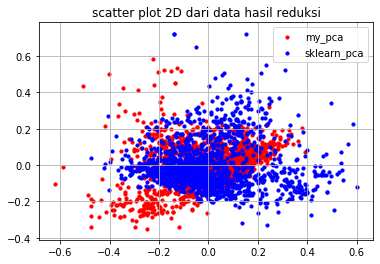


Dapat dilihat berdasarkan hasil plotting, kedua PCA memproyeksi data ke basis baru yang hampir serupa.
Terdapat beberapa titik yang sedikit tersebar dan cenderung "terbalik". Tentu hal ini disebabkan oleh perbedaan
eigen vector yang digunakan sebagai basis.



In [6]:
# plot PCA reduction results

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(my_reduced_dim_data[:, 0], my_reduced_dim_data[:, 1], color='red', s=10)
plt.scatter(sklearn_pca_data[:, 0], sklearn_pca_data[:, 1], color='blue', s=10)
plt.title('scatter plot 2D dari data hasil reduksi')
plt.legend(['my_pca', 'sklearn_pca'])
plt.grid()
plt.show()

explanation = """
Dapat dilihat berdasarkan hasil plotting, kedua PCA memproyeksi data ke basis baru yang hampir serupa.
Terdapat beberapa titik yang sedikit tersebar dan cenderung "terbalik". Tentu hal ini disebabkan oleh perbedaan
eigen vector yang digunakan sebagai basis.
"""
print(explanation)

<b>Linear Discriminant Analysis (LDA) (total 50 poin)</b>

1. <b>[25 poin]</b> Lakukan implementasi Linear Discriminant Analysis (LDA) pada dataset yeast dengan ketentuan sebagai berikut :

    a. Penggunaan library yang diperbolehkan pada implementasi hanya library numpy. 

    b. Berikan penjelasan/komentar singkat dari setiap langkah-langkah dari code yang anda buat!


2. <b>[10 poin]</b> Lakukan implementasi Linear Discriminant Analysis (LDA) dengan menggunakan library (mis: Scikit-Learn) pada dataset yeast.
3. <b>[5 poin]</b> Bandingkan hasil reduksi LDA secara manual dan LDA dengan menggunakan library! Apakah hasil yang diperoleh sama? Mengapa demikian?
4. <b>[10 poin]</b> Pilih 2 kolom untuk melakukan plotting data hasil reduksi yang anda peroleh pada nomor 1 dan 2, lakukan analisis sederhana dari hasil plotting yang dibuat !


1.

In [7]:
# Linear Discriminant Analysis (LDA) implementation

from numpy import linalg as LA

## LDA function
def myLDA(data, target):
    # encode target
    n_classes = np.unique(target).size
    encoder = {e:i for i,e in enumerate(np.unique(target))}
    decoder = {encoder[i]:i for i in encoder.keys()}
    encoded_target = np.array([encoder[i] for i in target])
    
    # separate data per class
    data_per_class = [data[encoded_target == i] for i in range(n_classes)]
    class_size = [data_per_class[i].shape[0] for i in range(n_classes)]
    
    # compute intra class matrix
    intra_mean = [np.sum(data_per_class[i], axis=0)/class_size[i] for i in range(n_classes)]
    diff_per_class = [data_per_class[i] - intra_mean[i] for i in range(n_classes)]
    outer_prod = [[np.outer(e.T, e.T) for e in diff_per_class[i]] for i in range(n_classes)]
    intra_mat = sum([sum(e) for e in outer_prod])
    
    # compute inter class matrix
    tot_mean = sum([class_size[i]*intra_mean[i] for i in range(n_classes)])/sum(class_size)
    mean_dev = [intra_mean[i]-tot_mean for i in range(n_classes)]
    outer_mean_dev = [np.outer(mean_dev[i], mean_dev[i]) for i in range(n_classes)]
    inter_mat = sum([class_size[i]*outer_mean_dev[i] for i in range(n_classes)])
    
    # compute eigen vector
    w, v = LA.eig(np.dot(LA.inv(intra_mat), inter_mat))
    
    ## compute reduced basis and reduced dimensionality data
    data = np.dot(data, v)
    return data, v, w

X, y = yeast_data, yeast_target
my_lda_data, my_lda_basis, my_lda_eigval = myLDA(X,y)
my_lda_data

print("Hasil dari implementasi LDA yang dibuat sendiri pada dataset yeast adalah sebagai berikut.")
print()
print("Reduced Basis dengan dimensi", my_lda_basis.shape)
print(my_lda_basis)
print()
print("Reduced Dimensionality Data dengan dimensi", my_lda_data.shape)
print(my_lda_data)

Hasil dari implementasi LDA yang dibuat sendiri pada dataset yeast adalah sebagai berikut.

Reduced Basis dengan dimensi (8, 8)
[[ 0.29375666  0.1559694   0.1385993   0.10243925 -0.45821303  0.13020737
   0.19295593  0.41316968]
 [ 0.23477662  0.09773498  0.08599419  0.06673381 -0.01067197 -0.23990256
  -0.34873438 -0.56441426]
 [-0.7854548   0.56600606  0.38439074  0.13762283 -0.16150981  0.09261838
  -0.17932685 -0.10683682]
 [ 0.1372245   0.11626592  0.05211945  0.11315     0.6127558  -0.24082518
   0.07869983  0.12176686]
 [ 0.41192824  0.32018295  0.63436633 -0.963954    0.30841398 -0.01971529
   0.13404423 -0.02456217]
 [ 0.12097454  0.7259637  -0.64764243 -0.14922518 -0.06621009 -0.10872433
   0.00558182  0.00698021]
 [-0.10105506  0.03910309  0.01885383 -0.01751285  0.43984047  0.39288908
  -0.8845825   0.67712504]
 [-0.16818227 -0.03422425  0.02656604 -0.0390864  -0.30888394 -0.8320735
  -0.04811798  0.15917198]]

Reduced Dimensionality Data dengan dimensi (1484, 8)
[[ 0.08272

2.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
X_lda = lda.fit(X, y).transform(X)

print("Hasil dari implementasi LDA sklearn pada dataset yeast adalah sebagai berikut.")
print()
print("Reduced Basis dengan dimensi", lda.covariance_.shape)
print(lda.covariance_)
print()
print("Reduced Dimensionality Data dengan dimensi", X_lda.shape)
print(X_lda)

Hasil dari implementasi LDA sklearn pada dataset yeast adalah sebagai berikut.

Reduced Basis dengan dimensi (8, 8)
[[ 1.16643736e-02  4.42597300e-03 -6.26719479e-04  6.73072222e-04
  -3.79451406e-05 -8.55287801e-05  5.68525953e-04 -4.49854678e-04]
 [ 4.42597300e-03  1.06160554e-02 -1.14377401e-03  1.49807873e-04
  -4.01115312e-05 -8.05964004e-05  5.93432620e-04 -1.80374106e-04]
 [-6.26719479e-04 -1.14377401e-03  4.06319406e-03  4.60826285e-04
  -6.35214152e-06 -1.26010606e-05 -6.37677771e-04 -5.99800850e-04]
 [ 6.73072222e-04  1.49807873e-04  4.60826285e-04  1.42769011e-02
  -7.73262336e-05 -2.12627078e-04 -8.44625402e-04  3.61924866e-04]
 [-3.79451406e-05 -4.01115312e-05 -6.35214152e-06 -7.73262336e-05
   1.50247994e-03 -1.45540917e-06  4.37306390e-05  4.73494480e-05]
 [-8.55287801e-05 -8.05964004e-05 -1.26010606e-05 -2.12627078e-04
  -1.45540917e-06  3.34986089e-03  7.11339965e-05  1.13057248e-05]
 [ 5.68525953e-04  5.93432620e-04 -6.37677771e-04 -8.44625402e-04
   4.37306390e-05  7

3.

In [9]:
# compare reduction result between manual LDA and sklearn LDA

answer = """
Hasil reduksi terlihat sangat berbeda. Terdapat kemungkinan perbedaan atau kesalahan pada implementasi manual.
"""

print(answer)


Hasil reduksi terlihat sangat berbeda. Terdapat kemungkinan perbedaan atau kesalahan pada implementasi manual.



4.

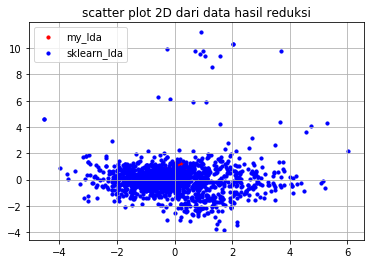

In [10]:
# plot LDA reduction results

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(my_lda_data[:, 0], my_lda_data[:, 1], color='red', s=10)
plt.scatter(X_lda[:, 0], X_lda[:, 1], color='blue', s=10)
plt.title('scatter plot 2D dari data hasil reduksi')
plt.legend(['my_lda', 'sklearn_lda'])
plt.grid()
plt.show()

explanation = """
"""
print(explanation)

<b>Pertanyaan bonus [10 poin] </b>

Bacalah paper berikut ini (file ada di Scele). 

A. M. Martinez and A. C. Kak, "PCA versus LDA," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 23, no. 2, pp. 228-233, Feb. 2001.

Jawab pertanyaan di bawah ini. 


1. Apa masalah dalam penelitian tersebut? Solusi apa yang ditawarkan penulis?




2. Bagaimana performa PCA dan LDA dalam menyelesaikan masalah dipaper tersebut? Manakah yang lebih baik?